In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [467]:
df = pd.read_csv('/content/eswd_events_5200.csv')

In [468]:
df.head()

,event_type,qc_level,intensity,city,region_country,datetime_utc,reporter,description,query_year,query_month,queried_event
0,Precip,QC0+,F-Scale: IF1,Genova,"Liguria, Italy",13/02/2001 09:23 UTC,Local Weather Service,Strong winds caused structural damage.,2001,2,Precip
1,Funnel,QC2,F-Scale: IF0,Madrid,Spain,25/11/2003 20:09 UTC,ESWD Management,Weak event reported with minor impacts.,2003,11,Funnel
2,Devil,QC0,EF1,Nagpur,"Maharashtra, India",01/09/2022 20:32 UTC,Local Weather Service,Strong winds caused structural damage.,2022,9,Devil
3,Precip,QC2,EF1,Madrid,Spain,26/10/2018 07:31 UTC,Meteorological Office,Weak event reported with minor impacts.,2018,10,Precip
4,Gustnado,QC0+,F-Scale: IF1,Zurich,Switzerland,06/04/2015 09:29 UTC,Meteorological Office,Weak event reported with minor impacts.,2015,4,Gustnado


In [469]:
df.tail()

,event_type,qc_level,intensity,city,region_country,datetime_utc,reporter,description,query_year,query_month,queried_event
5195,Precip,QC2,EF0,Tel Aviv,"Tel Aviv District, Israel",14/03/2022 20:27 UTC,Local Weather Service,Severe weather phenomenon confirmed by eyewitn...,2022,3,Precip
5196,Tornado,QC2,EF0,Vienna,Austria,01/04/2023 03:10 UTC,Meteorological Office,Damage to vegetation and light structures.,2023,4,Tornado
5197,Tornado,QC2,EF1,Rome,"Lazio, Italy",28/07/2007 10:37 UTC,Storm Chaser Network,Strong winds caused structural damage.,2007,7,Tornado
5198,Funnel,QC0+,NaN,Munich,"Bavaria, Germany",16/07/2011 13:06 UTC,Public Report,"Short-lived event, limited damage reported.",2011,7,Funnel
5199,Snow,QC1,NaN,Nagpur,"Maharashtra, India",13/02/2004 11:09 UTC,Storm Chaser Network,Severe weather phenomenon confirmed by eyewitn...,2004,2,Snow


In [470]:
df.describe()

,query_year,query_month
count,5200.000000,5200.000000
mean,2012.406538,6.544038
std,7.594966,3.448573
min,2000.000000,1.000000
25%,2006.000000,4.000000
50%,2012.000000,7.000000
75%,2019.000000,10.000000
max,2025.000000,12.000000


In [471]:
df.shape

(5200, 11)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_type      5200 non-null   object
 1   qc_level        5200 non-null   object
 2   intensity       4452 non-null   object
 3   city            5200 non-null   object
 4   region_country  5200 non-null   object
 5   datetime_utc    5200 non-null   object
 6   reporter        5200 non-null   object
 7   description     5200 non-null   object
 8   query_year      5200 non-null   int64 
 9   query_month     5200 non-null   int64 
 10  queried_event   5200 non-null   object
dtypes: int64(2), object(9)
memory usage: 447.0+ KB


In [473]:
df['intensity'] = df['intensity'].str.replace(
    r'^F-Scale:\s*', '', regex=True
)
df.head()

,event_type,qc_level,intensity,city,region_country,datetime_utc,reporter,description,query_year,query_month,queried_event
0,Precip,QC0+,IF1,Genova,"Liguria, Italy",13/02/2001 09:23 UTC,Local Weather Service,Strong winds caused structural damage.,2001,2,Precip
1,Funnel,QC2,IF0,Madrid,Spain,25/11/2003 20:09 UTC,ESWD Management,Weak event reported with minor impacts.,2003,11,Funnel
2,Devil,QC0,EF1,Nagpur,"Maharashtra, India",01/09/2022 20:32 UTC,Local Weather Service,Strong winds caused structural damage.,2022,9,Devil
3,Precip,QC2,EF1,Madrid,Spain,26/10/2018 07:31 UTC,Meteorological Office,Weak event reported with minor impacts.,2018,10,Precip
4,Gustnado,QC0+,IF1,Zurich,Switzerland,06/04/2015 09:29 UTC,Meteorological Office,Weak event reported with minor impacts.,2015,4,Gustnado


In [474]:
df2 = pd.DataFrame()
df2[['Region', 'Country']] = df['region_country'].str.split(',', n=1, expand=True)

df2['Country'] = df2['Country'].fillna(df2['Region'])
df2['Region'] = df2['Region'].where(df2['Country'] != df2['Region'])
df2.head(10)

,Region,Country
0,Liguria,Italy
1,NaN,Spain
2,Maharashtra,India
3,NaN,Spain
4,NaN,Switzerland
5,NaN,Switzerland
6,NaN,Spain
7,NaN,Austria
8,Liguria,Italy
9,Tel Aviv District,Israel


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_type      5200 non-null   object
 1   qc_level        5200 non-null   object
 2   intensity       4452 non-null   object
 3   city            5200 non-null   object
 4   region_country  5200 non-null   object
 5   datetime_utc    5200 non-null   object
 6   reporter        5200 non-null   object
 7   description     5200 non-null   object
 8   query_year      5200 non-null   int64 
 9   query_month     5200 non-null   int64 
 10  queried_event   5200 non-null   object
dtypes: int64(2), object(9)
memory usage: 447.0+ KB


In [476]:
3655/5200

0.7028846153846153

In [477]:
true_dat = (df['event_type'] == df['queried_event']).all()
true_dat

np.True_

In [478]:
df =df.drop(columns=['queried_event'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_type      5200 non-null   object
 1   qc_level        5200 non-null   object
 2   intensity       4452 non-null   object
 3   city            5200 non-null   object
 4   region_country  5200 non-null   object
 5   datetime_utc    5200 non-null   object
 6   reporter        5200 non-null   object
 7   description     5200 non-null   object
 8   query_year      5200 non-null   int64 
 9   query_month     5200 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 406.4+ KB


In [479]:
df.nunique()

,0
event_type,11
qc_level,4
intensity,6
city,10
region_country,10
datetime_utc,5198
reporter,6
description,6
query_year,26
query_month,12


In [480]:
df['region'] = df2['Region']
df['country'] = df2['Country']

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

df['datetime_utc'] = pd.to_datetime(
    df['datetime_utc'],
    format='%d/%m/%Y %H:%M UTC',
    errors='coerce'
)

df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df.head()

,event_type,qc_level,intensity,city,region_country,datetime_utc,reporter,description,query_year,query_month,region,country,year,month
0,Precip,QC0+,IF1,Genova,"Liguria, Italy",2001-02-13 09:23:00,Local Weather Service,Strong winds caused structural damage.,2001,2,Liguria,Italy,2001,2
1,Funnel,QC2,IF0,Madrid,Spain,2003-11-25 20:09:00,ESWD Management,Weak event reported with minor impacts.,2003,11,NaN,Spain,2003,11
2,Devil,QC0,EF1,Nagpur,"Maharashtra, India",2022-09-01 20:32:00,Local Weather Service,Strong winds caused structural damage.,2022,9,Maharashtra,India,2022,9
3,Precip,QC2,EF1,Madrid,Spain,2018-10-26 07:31:00,Meteorological Office,Weak event reported with minor impacts.,2018,10,NaN,Spain,2018,10
4,Gustnado,QC0+,IF1,Zurich,Switzerland,2015-04-06 09:29:00,Meteorological Office,Weak event reported with minor impacts.,2015,4,NaN,Switzerland,2015,4


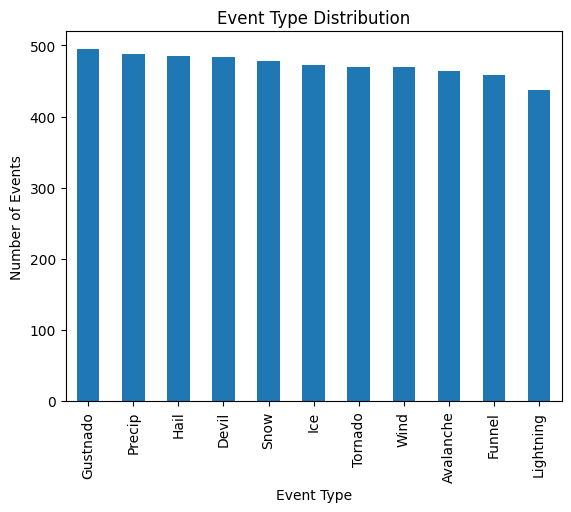

In [482]:
plt.figure()
df['event_type'].value_counts().plot(kind='bar')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.show()


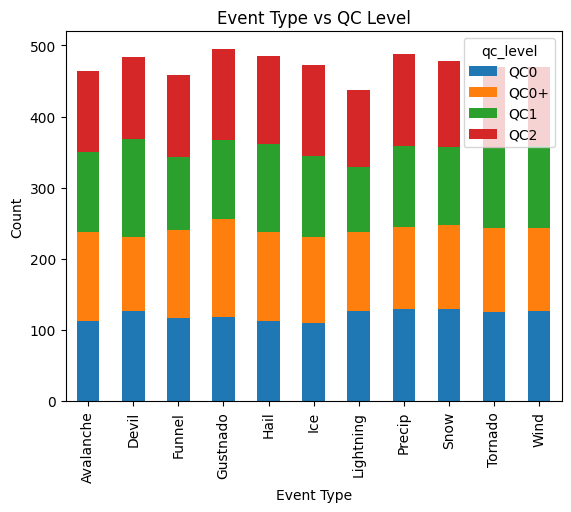

In [483]:
pd.crosstab(df['event_type'], df['qc_level']).plot(
    kind='bar', stacked=True
)
plt.title('Event Type vs QC Level')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()


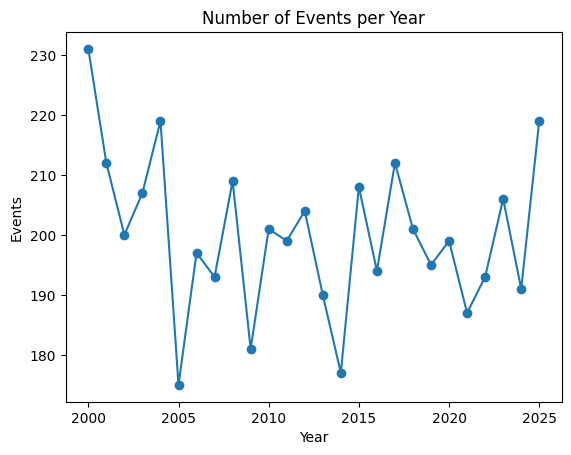

In [484]:
df.groupby('year').size().plot(marker='o')
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Events')
plt.show()


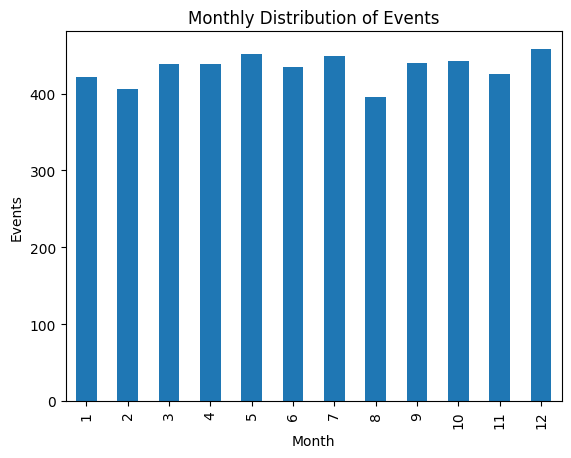

In [485]:
df.groupby('month').size().plot(kind='bar')
plt.title('Monthly Distribution of Events')
plt.xlabel('Month')
plt.ylabel('Events')
plt.show()


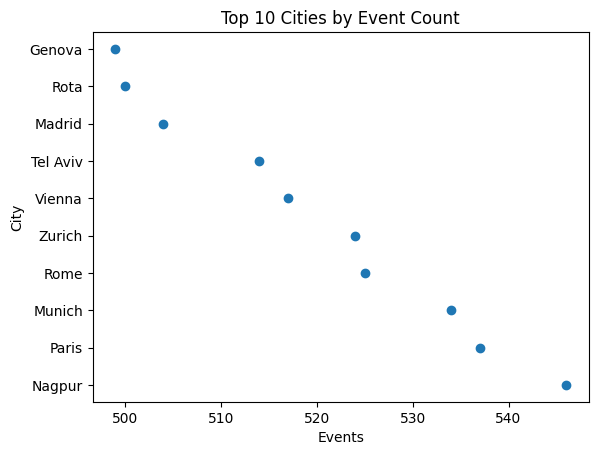

In [486]:
city_counts = df['city'].value_counts().head(10)

plt.figure()
plt.scatter(city_counts.values, city_counts.index)
plt.title('Top 10 Cities by Event Count')
plt.xlabel('Events')
plt.ylabel('City')
plt.show()


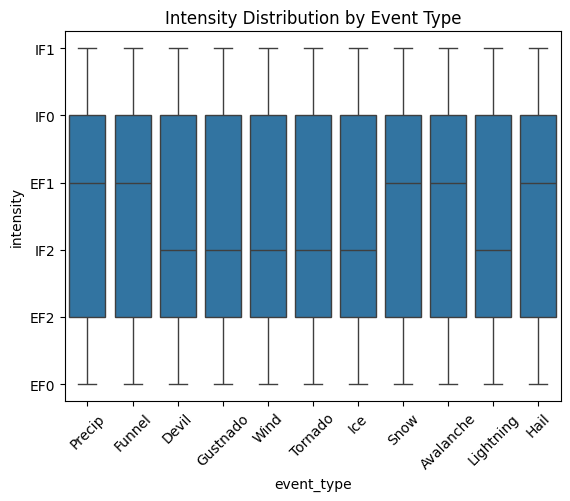

In [487]:
sns.boxplot(x='event_type', y='intensity', data=df)
plt.xticks(rotation=45)
plt.title('Intensity Distribution by Event Type')
plt.show()


In [489]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [490]:
df['event_type'] = le.fit_transform(df['event_type'])
df['qc_level'] = le.fit_transform(df['qc_level'])
df['region'] = le.fit_transform(df['region'])
df['reporter'] = le.fit_transform(df['reporter'])
df.drop(columns=['region_country'], inplace=True)
df.head()

,event_type,qc_level,intensity,city,datetime_utc,reporter,description,query_year,query_month,region,country,year,month,desc_len
0,7,1,IF1,Genova,2001-02-13 09:23:00,1,Strong winds caused structural damage.,2001,2,3,Italy,2001,2,38
1,2,3,IF0,Madrid,2003-11-25 20:09:00,0,Weak event reported with minor impacts.,2003,11,7,Spain,2003,11,39
2,1,0,EF1,Nagpur,2022-09-01 20:32:00,1,Strong winds caused structural damage.,2022,9,4,India,2022,9,38
3,7,3,EF1,Madrid,2018-10-26 07:31:00,2,Weak event reported with minor impacts.,2018,10,7,Spain,2018,10,39
4,3,1,IF1,Zurich,2015-04-06 09:29:00,2,Weak event reported with minor impacts.,2015,4,7,Switzerland,2015,4,39


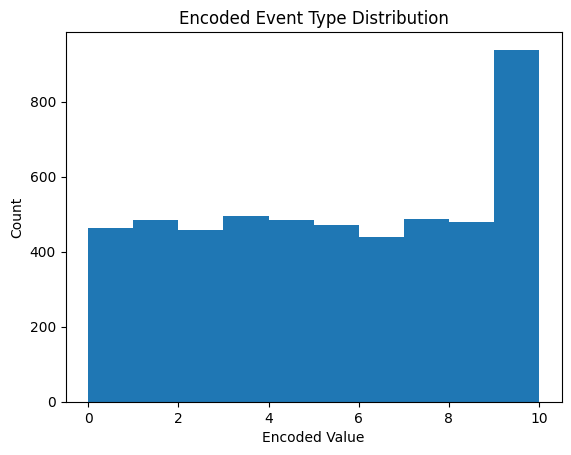

In [493]:
plt.hist(df['event_type'], bins=10)
plt.title('Encoded Event Type Distribution')
plt.xlabel('Encoded Value')
plt.ylabel('Count')
plt.show()


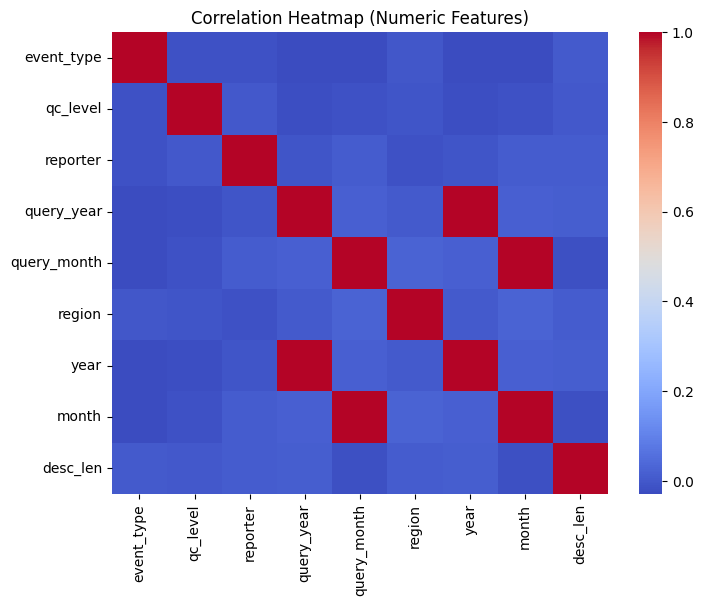

In [494]:
num_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


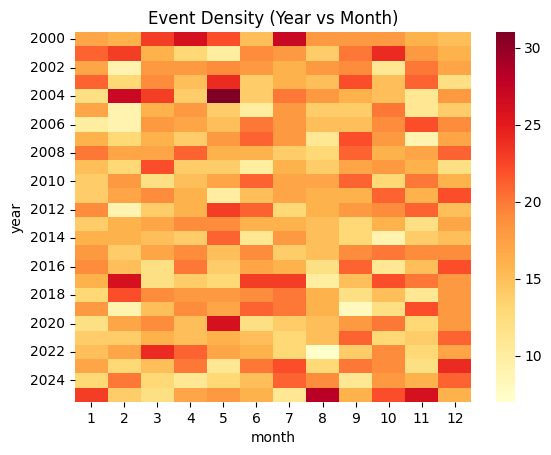

In [495]:
pivot = df.pivot_table(
    index='year',
    columns='month',
    values='event_type',
    aggfunc='count'
)

sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Event Density (Year vs Month)')
plt.show()
